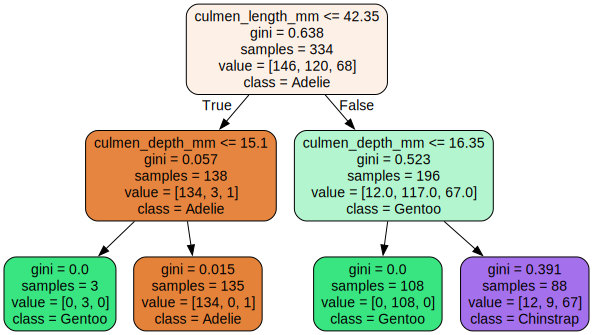

In [4]:
import sys
import sklearn
from graphviz import Source
from sklearn.tree import export_graphviz
import numpy as np
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn.tree import export_graphviz
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\Fail\Downloads\windows_10_cmake_Release_Graphviz-11.0.0-win64\Graphviz-11.0.0-win64\bin'
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv("./penguins_size.csv")
df = df.dropna()

sex_int = {'male': 1, 'female': 0}
species_int = {'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2}
species_names = ['Adelie', 'Gentoo', 'Chinstrap']

df['sex'] = df['sex'].map(sex_int)
df['species'] = df['species'].map(species_int)
X = df.drop(['species', 'island'], axis=1)[['culmen_length_mm', 'culmen_depth_mm']]
y = df['species']
X = X.rename(columns={'culmen_length_mm': 0, 'culmen_depth_mm': 1})
columns_names = ['culmen_length_mm', 'culmen_depth_mm']
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)
export_graphviz(
    tree_clf,
    out_file=os.path.join(".", "penguin_tree.dot"),
    feature_names=columns_names,
    class_names=species_names,
    rounded=True,
    filled=True
)

Source.from_file(os.path.join(".", "penguin_tree.dot"))

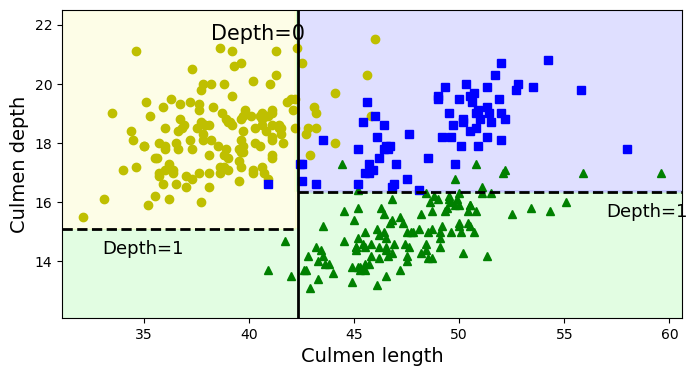

In [5]:
from matplotlib.colors import ListedColormap

x_min = X[0].min()-1
x_max = X[0].max()+1
y_min = X[1].min()-1
y_max = X[1].max()+1
limits = [x_min, x_max, y_min, y_max]

def plot_decision_boundary(clf, X, y, axes=limits, penguin=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#a0faa0','#9898ff'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not penguin:
        custom_cmap2 = ListedColormap(['#7d7d58','#507d50','#4c4c7f'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        if isinstance(X, pd.DataFrame):
            x_plot = [X.iloc[:, 0], X.iloc[:, 1]]
        else:
            x_plot = [X[:, 0], X[:, 1]]
        plt.plot(x_plot[0][y==0], x_plot[1][y==0], "yo", label=species_names[0])
        plt.plot(x_plot[0][y==1], x_plot[1][y==1], "g^", label=species_names[1])
        plt.plot(x_plot[0][y==2], x_plot[1][y==2], "bs", label=species_names[2])
        plt.axis(axes)
    if penguin:
        plt.xlabel("Culmen length", fontsize=14)
        plt.ylabel("Culmen depth", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([42.35, 42.35], [y_min, y_max], "k-", linewidth=2)
plt.plot([x_min, 42.35], [15.1, 15.1], "k--", linewidth=2)
plt.plot([42.35, x_max], [16.35, 16.35], "k--", linewidth=2)
plt.text(38.2, 21.5, "Depth=0", fontsize=15)
plt.text(33, 14.25, "Depth=1", fontsize=13)
plt.text(57, 15.5, "Depth=1", fontsize=13)

plt.show()

In [7]:
tree_clf.predict_proba([[57, 16]])

array([[0., 1., 0.]])

In [8]:
species_names[tree_clf.predict([[57, 16]])[0]]

'Gentoo'

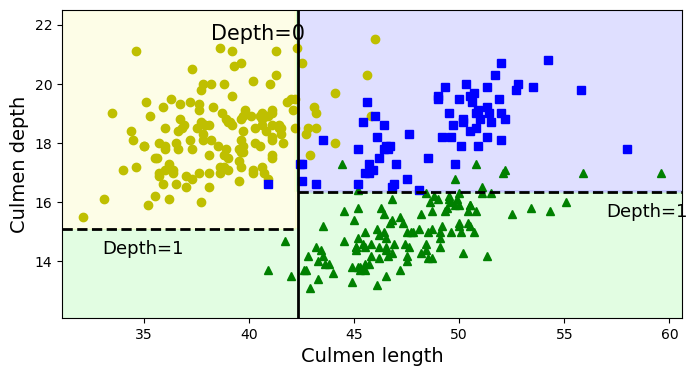

In [10]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=5)
tree_clf_tweaked.fit(X, y)
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([42.35, 42.35], [y_min, y_max], "k-", linewidth=2)
plt.plot([x_min, 42.35], [15.1, 15.1], "k--", linewidth=2)
plt.plot([42.35, x_max], [16.35, 16.35], "k--", linewidth=2)
plt.text(38.2, 21.5, "Depth=0", fontsize=15)
plt.text(33, 14.25, "Depth=1", fontsize=13)
plt.text(57, 15.5, "Depth=1", fontsize=13)

plt.show()

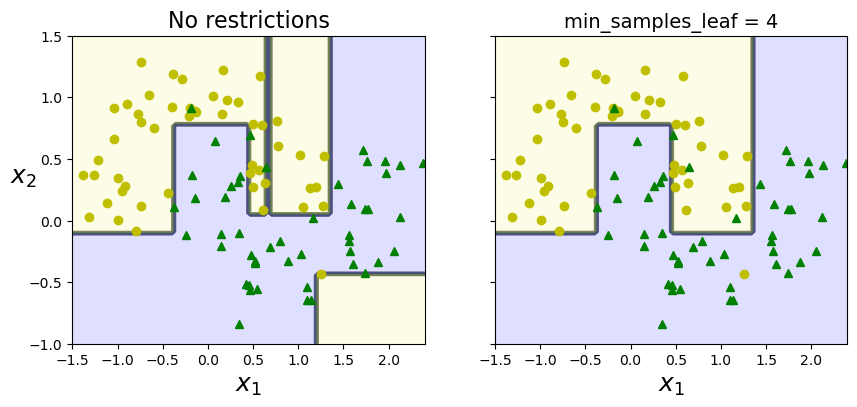

In [11]:


from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], penguin=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], penguin=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()



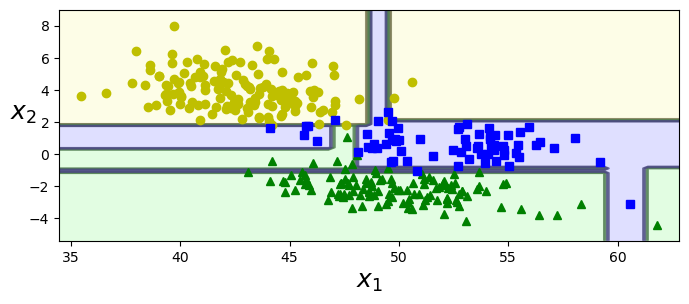

In [12]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

x_min_rot = Xr[0].min()-1
x_max_rot = Xr[0].max()+1
y_min_rot = Xr[1].min()-1
y_max_rot = Xr[1].max()+1
limits_rot = [x_min_rot, x_max_rot, y_min_rot, y_max_rot]

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=limits_rot, penguin=False)

plt.show()

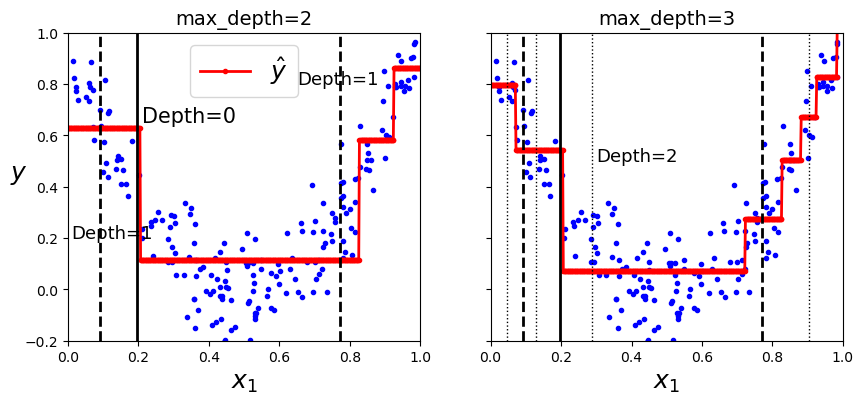

In [14]:
from sklearn.tree import DecisionTreeRegressor
np.random.seed(100500)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

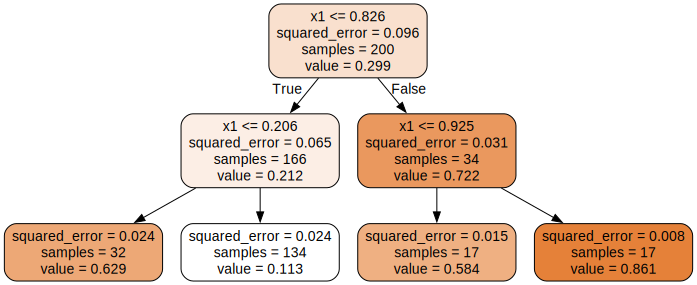

In [15]:
export_graphviz(
    tree_reg1,
    out_file=os.path.join(".", "regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)

Source.from_file(os.path.join(".", "regression_tree.dot"))

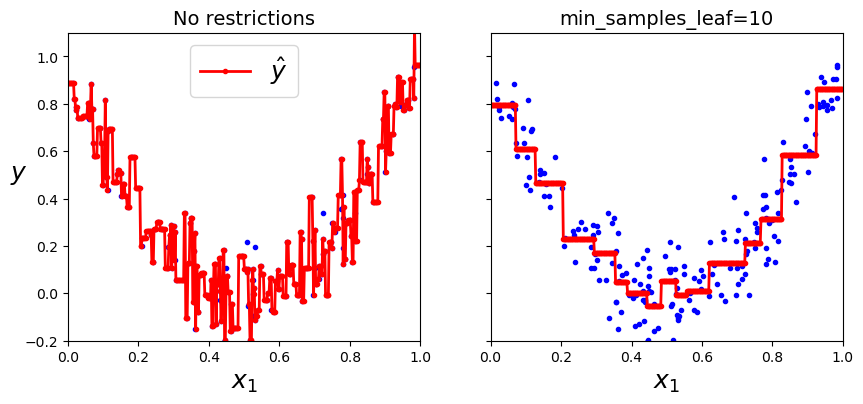

In [16]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()